# Importing Libraries

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers

# Reading the CSV dataset & Pre-processing

In [14]:
dataset_path= r'../input/league-of-legends-diamond-ranked-games-10-min/high_diamond_ranked_10min.csv'
data= pd.read_csv(dataset_path)
print(f"The shape of the dataset is:> {data.shape} ie. rows:> {data.shape[0]} and columns:> {data.shape[1]}")
data.head(5)

The shape of the dataset is:> (9879, 40) ie. rows:> 9879 and columns:> 40


,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [15]:
#Since gameId is of no use for training the model so we can drop the gameId from the data
data.drop('gameId', axis=1, inplace=True) #axis=1 for horizontal axis

In [16]:
print(f"The new shape of the data after a column is deleted:> {data.shape}")
data.head(5)

The new shape of the data after a column is deleted:> (9879, 39)


,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [17]:
#removing the column blueWins from the data as this is what is need to be predicted
y= data['blueWins']
X= data.drop('blueWins',axis=1, inplace=False)
print(f"The new shape of data is:> {X.shape}")

The new shape of data is:> (9879, 38)


# Correlation matrix
Link:> https://www.statology.org/how-to-read-a-correlation-matrix/

<AxesSubplot:>

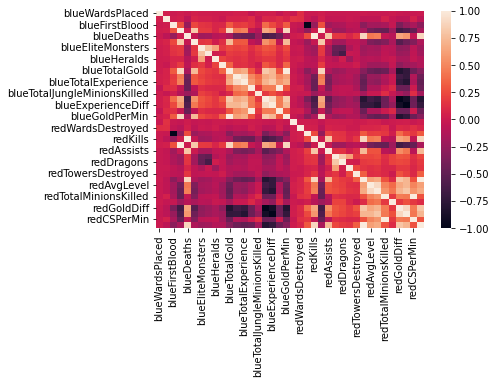

In [18]:
sns.heatmap(X.corr())

# Splitting the Dataset

A **ceil function** returns the smallest value that is greater or equal to the specified number while the **floor function** returns the largest number that is less than or equal to the number.

In [36]:
#checking for class imbalance
imbalances= y.sum()/y.shape
print(f"Since there is almost no class imbalance as the % is {imbalances[0]} ~ 50%, so we can use accuracy as a metric")

Since there is almost no class imbalance as the % is 0.4990383642069035 ~ 50%, so we can use accuracy as a metric


In [37]:
## train_test_split = 0.7

num_training_examples= int(X.shape[0] * train_test_split)
num_testing_examples= int(X.shape[0] - num_training_examples)

print(f"Training samples:> {num_training_examples} \nTesting samples:> {num_testing_examples}")

#extracting the rows based on the splits defined above
X_train= X.iloc[:num_training_examples,:]
Y_train= y.iloc[:num_training_examples]

X_test= X.iloc[num_training_examples:,:]
Y_test= y.iloc[num_training_examples:]

print(f"X_train:> {X_train.shape} Y_train:> {Y_train.shape} \nX_test:> {X_test.shape} Y_test:> {Y_test.shape} ")

Training samples:> 6915 
Testing samples:> 2964
X_train:> (6915, 38) Y_train:> (6915,) 
X_test:> (2964, 38) Y_test:> (2964,) 


# Defining and training the model
callbacks: https://blog.paperspace.com/tensorflow-callbacks/

In [78]:
inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(19, activation=tf.nn.relu)(inputs)
x = tf.keras.layers.Dense(19, activation=tf.nn.relu)(x)
x = tf.keras.layers.Dense(19, activation=tf.nn.relu)(x)
x = tf.keras.layers.Dense(19, activation=tf.nn.relu)(x)
outputs = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 38)]              0         
_________________________________________________________________
dense_12 (Dense)             (None, 19)                741       
_________________________________________________________________
dense_13 (Dense)             (None, 19)                380       
_________________________________________________________________
dense_14 (Dense)             (None, 19)                380       
_________________________________________________________________
dense_15 (Dense)             (None, 19)                380       
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 40        
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________

In [79]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
)

model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)


In [80]:
BATCH_SIZE = 32
EPOCHS = 500
rop= tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                     factor=0.1, 
                                     patience=10, 
                                     verbose=0, 
                                     mode='auto',    
                                     min_delta=0.0001, 
                                     cooldown=0, 
                                     min_lr=0)
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                min_delta=0, 
                                patience=10, 
                                verbose=0, 
                                mode='auto', 
                                baseline=None, 
                                restore_best_weights=True)
callbacks_list= [rop,es]

history= model.fit(
    x=X_train,
    y=Y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1,
    validation_split=0.2,
    shuffle=True,
    callbacks=callbacks_list
)

Epoch 1/500
173/173 [==============================] - 1s 4ms/step - loss: 32.7053 - accuracy: 0.6473 - val_loss: 2.9470 - val_accuracy: 0.7129
Epoch 2/500
173/173 [==============================] - 0s 2ms/step - loss: 3.3271 - accuracy: 0.6435 - val_loss: 2.4244 - val_accuracy: 0.5770
Epoch 3/500
173/173 [==============================] - 0s 2ms/step - loss: 2.2011 - accuracy: 0.6446 - val_loss: 2.5788 - val_accuracy: 0.5416
Epoch 4/500
173/173 [==============================] - 0s 2ms/step - loss: 2.4512 - accuracy: 0.6347 - val_loss: 3.2212 - val_accuracy: 0.5589
Epoch 5/500
173/173 [==============================] - 0s 2ms/step - loss: 2.0141 - accuracy: 0.6437 - val_loss: 3.9303 - val_accuracy: 0.6175
Epoch 6/500
173/173 [==============================] - 0s 2ms/step - loss: 1.9981 - accuracy: 0.6462 - val_loss: 1.8651 - val_accuracy: 0.6992
Epoch 7/500
173/173 [==============================] - 0s 2ms/step - loss: 1.5802 - accuracy: 0.6473 - val_loss: 1.5606 - val_accuracy: 0.527

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


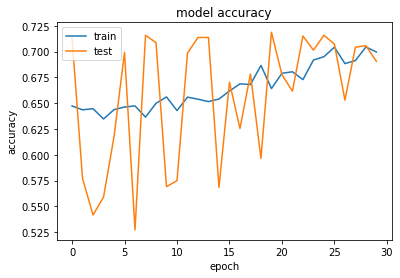

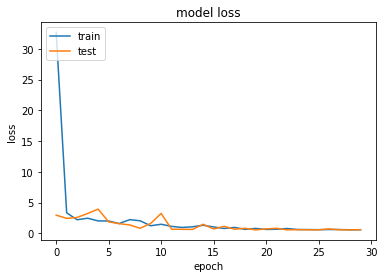

In [81]:
print(history.history.keys())
import matplotlib.pyplot as plt
# summarize training for accuracy
plt.plot(history.history['accuracy'])   # training is the variable from the fit method
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [82]:
loss, accuracy = model.evaluate(X_test, Y_test)

93/93 [==============================] - 0s 1ms/step - loss: 0.5312 - accuracy: 0.7372
